## Simulate a an AR(1) Process

In [19]:
import numpy as np
from bokeh.plotting import figure, output_file, show
import seaborn as sns
%matplotlib inline
import pandas as pd
sns.set(rc={'figure.figsize':(11.7,8.27)})
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import pmdarima import auto_arima
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [64]:
ar1 = np.array([1, 0.75])
ar1_sim = ArmaProcess(ar1)
ar1_data=ar1_sim.generate_sample(nsample=100)
date_array=pd.date_range(start='1/1/2018', end='4/10/2018')

In [65]:
ar1_df=pd.merge((pd.DataFrame(date_array, columns=['date'])), (pd.DataFrame(ar1_data, columns=['ar1_ts'])), left_index=True, right_index=True)

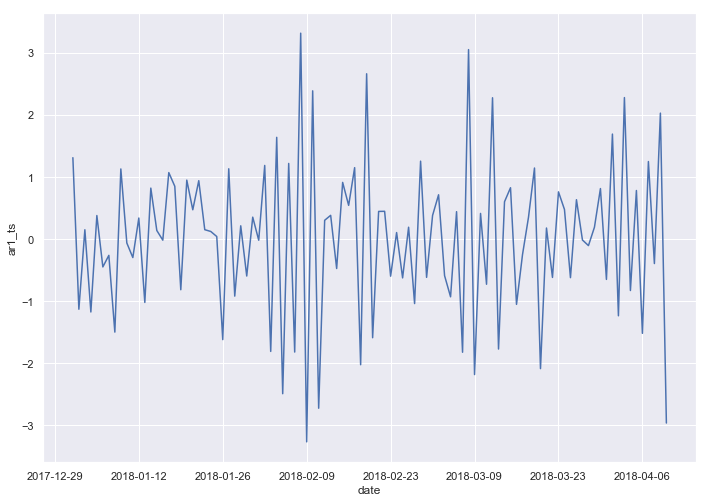

In [66]:
ax = sns.lineplot(x="date", y="ar1_ts", data=ar1_df)

#### https://campus.datacamp.com/courses/introduction-to-time-series-analysis-in-python/autoregressive-ar-models?ex=2

#### Helper function for stationarity test

In [25]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
    def ADF_Stationarity_Test(self, timeseries, printResults = True):

            #Dickey-Fuller test:
            adfTest = adfuller(timeseries, autolag='AIC')

            self.pValue = adfTest[1]

            if (self.pValue<self.SignificanceLevel):
                self.isStationary = True
            else:
                self.isStationary = False

            if printResults:
                dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])

                #Add Critical Values
                for key,value in adfTest[4].items():
                    dfResults['Critical Value (%s)'%key] = value

                print('Augmented Dickey-Fuller Test Results:')
                print(dfResults)


In [67]:
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(ar1_data, printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -24.239970
P-Value                  0.000000
# Lags Used              0.000000
# Observations Used     99.000000
Critical Value (1%)     -3.498198
Critical Value (5%)     -2.891208
Critical Value (10%)    -2.582596
dtype: float64
Is the time series stationary? True


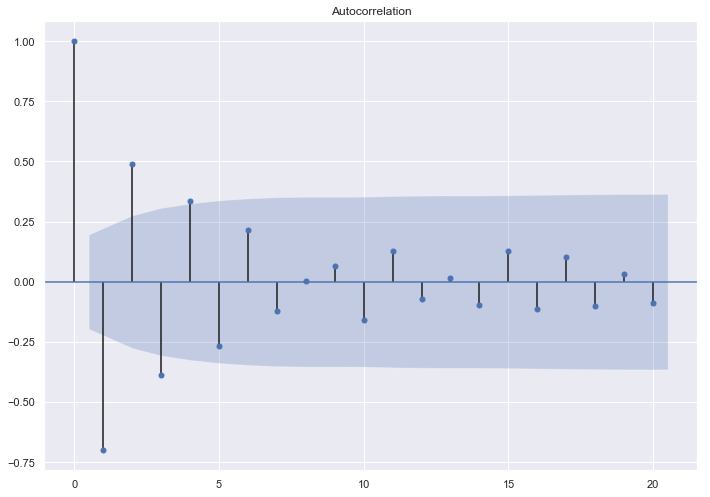

In [68]:
# Plot autocorrelation function of white noise returns
wn_acfs=plot_acf(ar1_data, lags=20)


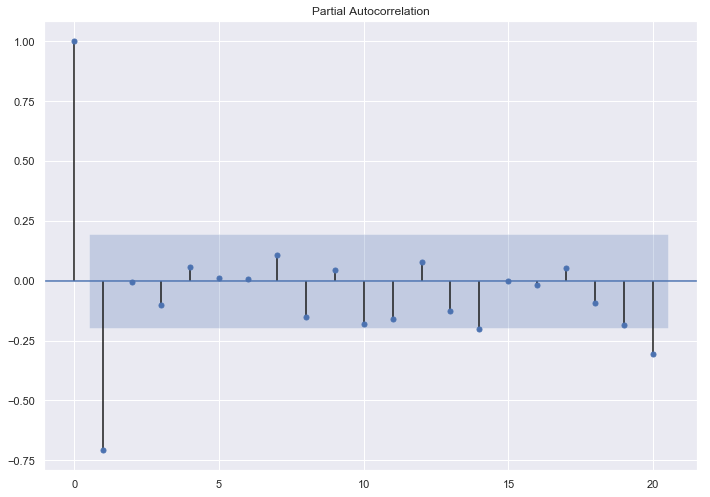

In [69]:
wn_pacfs= plot_pacf(ar1_data, lags=20)

In [70]:
train,test=ar1_df.iloc[0:81, 1:2],ar1_df.iloc[81:, 1:2]


In [71]:
# Fit a simple auto_arima model
ar_arima =auto_arima(train, max_p=2, max_q=2, max_iter=1000000)

c:\users\austi\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\austi\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [72]:
predictions=ar_arima.predict(n_periods=len(test))
predictions_df=pd.DataFrame(predictions, columns=['ar1_ts'])
predictions_df['type']='predicted'
predictions_df['date']=pd.date_range(start='3/23/2018', end='4/10/2018')
actuals=ar1_df.iloc[81:, ]
actuals['type']='actuals'
combined=predictions_df.append(actuals, ignore_index=True)

c:\users\austi\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


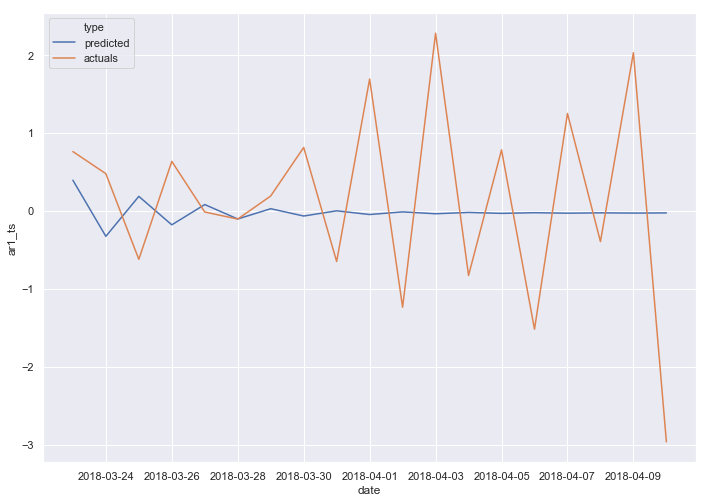

In [73]:
sns.lineplot(x="date", y="ar1_ts", hue="type", data=combined)